In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("New York.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45756 entries, 0 to 45755
Data columns (total 16 columns):
id                                45756 non-null int64
name                              45738 non-null object
host_id                           45756 non-null int64
host_name                         45742 non-null object
neighbourhood_group               45756 non-null object
neighbourhood                     45756 non-null object
latitude                          45756 non-null float64
longitude                         45756 non-null float64
room_type                         45756 non-null object
price                             45756 non-null int64
minimum_nights                    45756 non-null int64
number_of_reviews                 45756 non-null int64
last_review                       35123 non-null object
reviews_per_month                 35123 non-null float64
calculated_host_listings_count    45756 non-null int64
availability_365                  45756 non-null int64

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,76,1,349,2020-08-23,4.82,1,272
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.686880,-73.955960,Private room,60,29,50,2019-12-02,0.36,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.661200,-73.994230,Entire home/apt,175,7,1,2014-01-02,0.01,1,352
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.764890,-73.984930,Private room,79,2,473,2020-03-15,3.42,1,346
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.801780,-73.967230,Private room,75,2,118,2017-07-21,0.88,1,0
6,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.713440,-73.990370,Entire home/apt,140,1,161,2019-07-29,1.20,4,288
7,5552,Spacious river view in the West Village,8380,Maria,Manhattan,West Village,40.735520,-74.010420,Entire home/apt,160,3,66,2019-08-10,0.49,1,96
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.668290,-73.987790,Private room,86,4,180,2020-03-18,1.30,3,365
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.798260,-73.961130,Private room,85,2,123,2019-12-09,0.89,1,365


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0dbda1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0dbdaa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf0dbda080>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0dbe5320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0dbe5748>],
 'means': []}

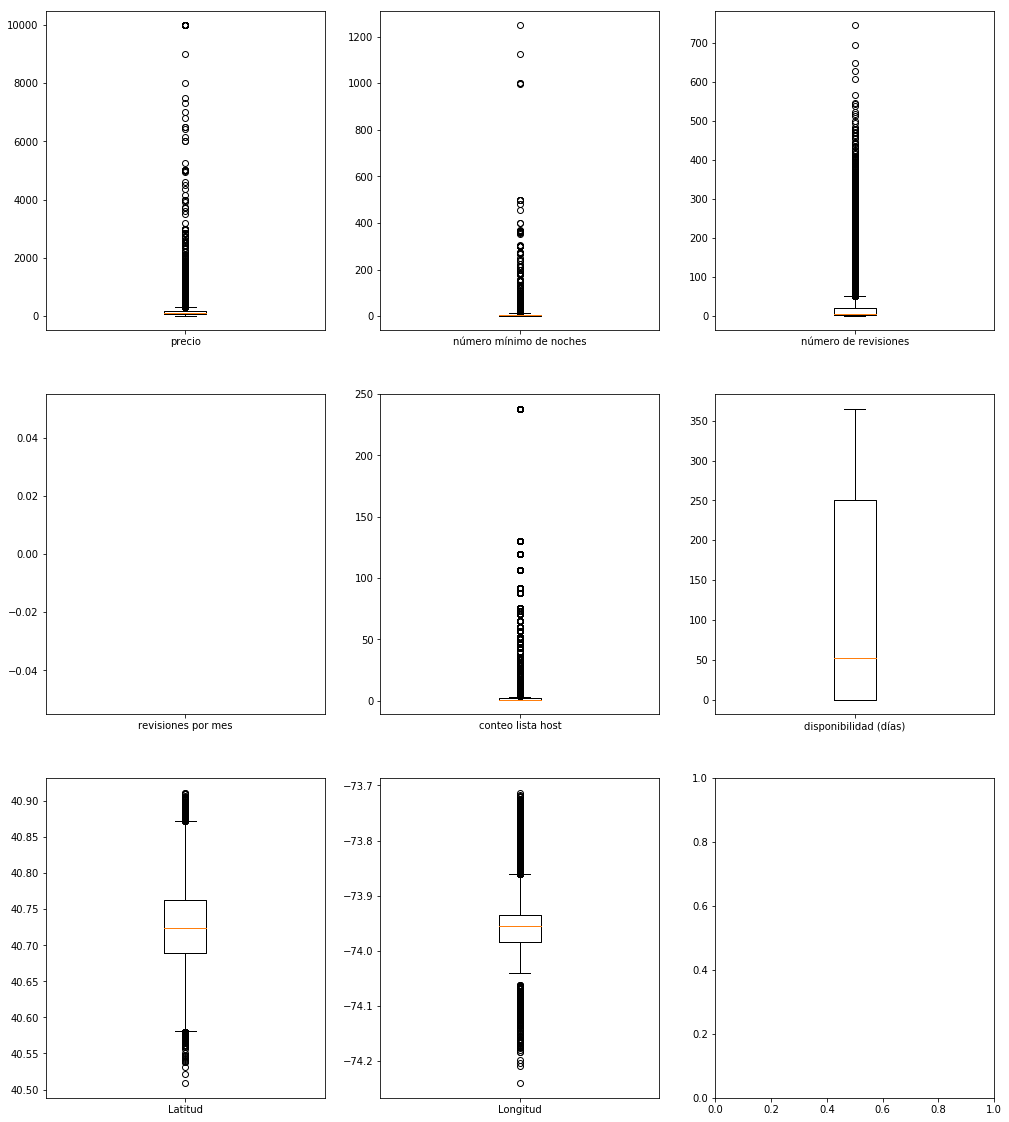

In [4]:
fig,ax=plt.subplots(3,3,figsize=(17,20))
ax[0,0].boxplot(df["price"],labels=["precio"])
ax[0,1].boxplot(df["minimum_nights"],labels=["número mínimo de noches"])
ax[0,2].boxplot(df["number_of_reviews"],labels=["número de revisiones"])
ax[1,0].boxplot(df["reviews_per_month"],labels=["revisiones por mes"])
ax[1,1].boxplot(df["calculated_host_listings_count"],labels=["conteo lista host"])
ax[1,2].boxplot(df["availability_365"],labels=["disponibilidad (días)"])
ax[2,0].boxplot(df["latitude"],labels=["Latitud"])
ax[2,1].boxplot(df["longitude"],labels=["Longitud"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0f179860>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0f183160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf0f179710>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0f1839b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0f183dd8>],
 'means': []}

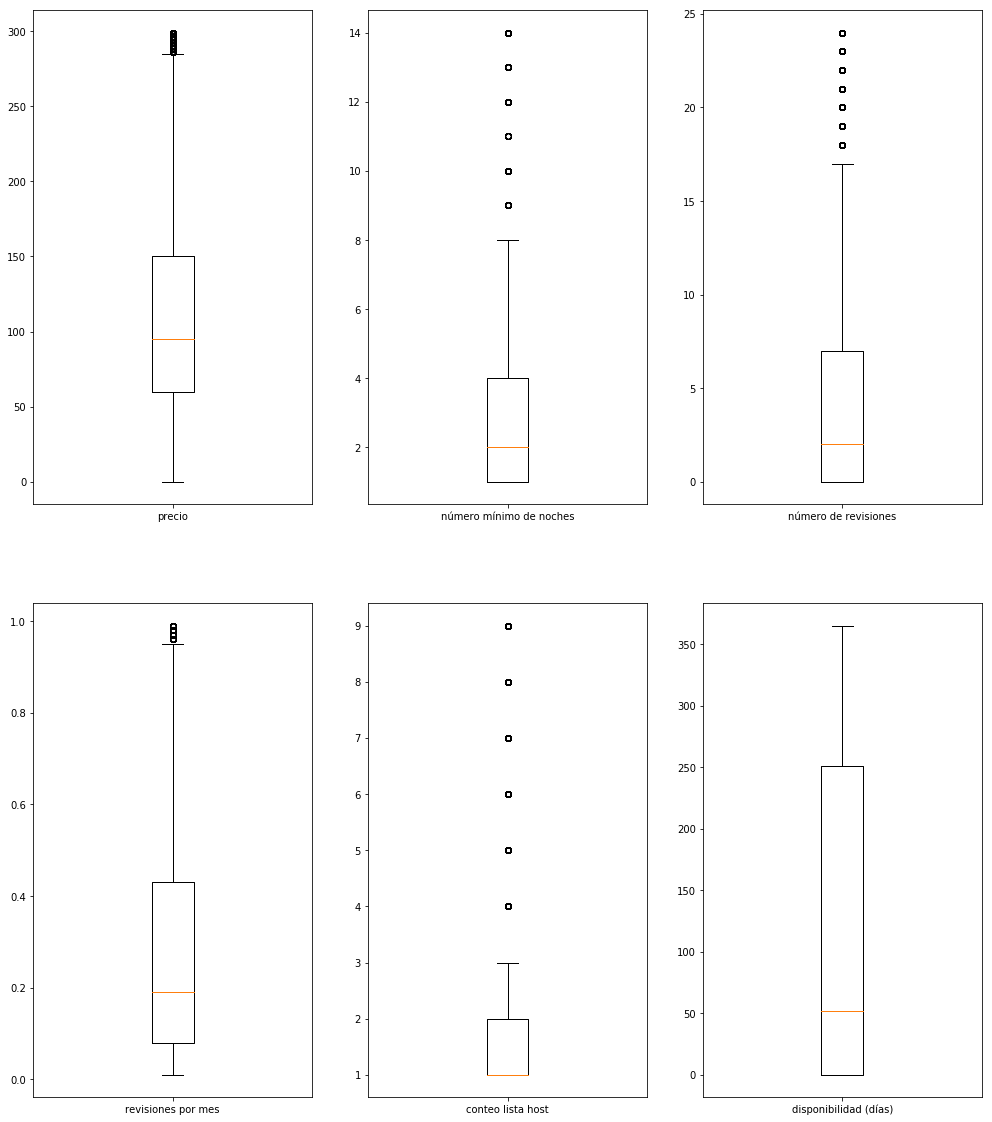

In [5]:
fig,ax=plt.subplots(2,3,figsize=(17,20))
df_p=df[df["price"]<300]
ax[0,0].boxplot(df_p["price"],labels=["precio"])
df_mn=df[df["minimum_nights"]<15]
ax[0,1].boxplot(df_mn["minimum_nights"],labels=["número mínimo de noches"])
df_nr=df[df["number_of_reviews"]<25]
ax[0,2].boxplot(df_nr["number_of_reviews"],labels=["número de revisiones"])
df_rpm=df[df["reviews_per_month"]<1]
ax[1,0].boxplot(df_rpm["reviews_per_month"],labels=["revisiones por mes"])
df_ch=df[df["calculated_host_listings_count"]<10]
ax[1,1].boxplot(df_ch["calculated_host_listings_count"],labels=["conteo lista host"])
ax[1,2].boxplot(df["availability_365"],labels=["disponibilidad (días)"])


## Cuantificando Variables Categóricas y Extracción Año y Fecha

In [6]:
vecindarios=df["neighbourhood_group"].unique()
n_vecindarios=np.arange(1,len(df["neighbourhood_group"].unique())+1)
tipo_habitaciones=df["room_type"].unique()
n_tipo_habitaciones=np.arange(1,len(df["room_type"].unique())+1)
df_vec=pd.DataFrame({"Vecindarios":vecindarios,"Categoría":n_vecindarios})
df_t_hab=pd.DataFrame({"Tipo Habitación":tipo_habitaciones,"Categoría":n_tipo_habitaciones})
df_vec

,Vecindarios,Categoría
0,Manhattan,1
1,Brooklyn,2
2,Queens,3
3,Staten Island,4
4,Bronx,5


In [7]:
df_t_hab

,Tipo Habitación,Categoría
0,Entire home/apt,1
1,Private room,2
2,Shared room,3
3,Hotel room,4


##### Reemplazo y Adición de columnas (Mes y Año) en el df 

In [8]:
df_cat=df[["price","minimum_nights","number_of_reviews","last_review","reviews_per_month","calculated_host_listings_count","availability_365"]].replace(to_replace=vecindarios,value=n_vecindarios).replace(to_replace=tipo_habitaciones,value=n_tipo_habitaciones)
df_cat["month"]=pd.to_datetime(df_cat["last_review"]).dt.month
df_cat["year"]=pd.to_datetime(df_cat["last_review"]).dt.year
df_cat

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,year
0,175,3,48,2019-11-04,0.37,2,365,11.0,2019.0
1,76,1,349,2020-08-23,4.82,1,272,8.0,2020.0
2,60,29,50,2019-12-02,0.36,1,365,12.0,2019.0
3,175,7,1,2014-01-02,0.01,1,352,1.0,2014.0
4,79,2,473,2020-03-15,3.42,1,346,3.0,2020.0
5,75,2,118,2017-07-21,0.88,1,0,7.0,2017.0
6,140,1,161,2019-07-29,1.20,4,288,7.0,2019.0
7,160,3,66,2019-08-10,0.49,1,96,8.0,2019.0
8,86,4,180,2020-03-18,1.30,3,365,3.0,2020.0
9,85,2,123,2019-12-09,0.89,1,365,12.0,2019.0


In [9]:
#df[["price","minimum_nights","number_of_reviews","last_review","reviews_per_month","calculated_host_listings_count","availability_365"]].corr()
df_cat.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month,year
price,1.000000,0.014261,-0.036840,-0.033542,0.007802,0.046522,0.005032,-0.020931
minimum_nights,0.014261,1.000000,-0.070191,-0.085503,0.157298,0.151545,-0.004409,-0.004883
number_of_reviews,-0.036840,-0.070191,1.000000,0.727895,-0.077755,0.181533,-0.074064,0.302497
reviews_per_month,-0.033542,-0.085503,0.727895,1.000000,-0.056880,0.215744,-0.036136,0.417884
calculated_host_listings_count,0.007802,0.157298,-0.077755,-0.056880,1.000000,0.179879,-0.001239,0.075775
availability_365,0.046522,0.151545,0.181533,0.215744,0.179879,1.000000,0.000627,0.337927
month,0.005032,-0.004409,-0.074064,-0.036136,-0.001239,0.000627,1.000000,-0.278985
year,-0.020931,-0.004883,0.302497,0.417884,0.075775,0.337927,-0.278985,1.000000


In [10]:
df_catnonull=df_cat.dropna(axis=0)
print(f"cantidad de filas {len(df_catnonull)}")
df_catnonull.corr()

cantidad de filas 35123


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month,year
price,1.000000,0.008851,-0.029027,-0.033542,-0.007128,0.053939,0.005032,-0.020931
minimum_nights,0.008851,1.000000,-0.055149,-0.085503,0.156180,0.117691,-0.004409,-0.004883
number_of_reviews,-0.029027,-0.055149,1.000000,0.727895,-0.067587,0.213329,-0.074064,0.302497
reviews_per_month,-0.033542,-0.085503,0.727895,1.000000,-0.056880,0.215744,-0.036136,0.417884
calculated_host_listings_count,-0.007128,0.156180,-0.067587,-0.056880,1.000000,0.186591,-0.001239,0.075775
availability_365,0.053939,0.117691,0.213329,0.215744,0.186591,1.000000,0.000627,0.337927
month,0.005032,-0.004409,-0.074064,-0.036136,-0.001239,0.000627,1.000000,-0.278985
year,-0.020931,-0.004883,0.302497,0.417884,0.075775,0.337927,-0.278985,1.000000


In [11]:
df_out=df_cat[(df_cat["price"]<320)&(df_cat["minimum_nights"]<10)&(df_cat["number_of_reviews"]<20)&(df_cat["reviews_per_month"]<1)&(df_cat["calculated_host_listings_count"]<4)]
print(f"cantidad de filas {len(df_out)}")
df_out

cantidad de filas 15373


,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,year
3,175,7,1,2014-01-02,0.01,1,352,1.0,2014.0
14,299,3,9,2011-12-28,0.07,1,359,12.0,2011.0
29,120,3,12,2019-07-13,0.09,1,160,7.0,2019.0
38,110,5,19,2019-05-18,0.15,1,365,5.0,2019.0
47,250,3,4,2017-09-24,0.10,1,0,9.0,2017.0
64,130,6,17,2019-07-20,0.14,1,269,7.0,2019.0
67,50,1,2,2016-02-14,0.04,1,0,2.0,2016.0
74,99,1,3,2019-10-21,0.13,1,365,10.0,2019.0
87,140,7,12,2017-12-11,0.11,1,157,12.0,2017.0
92,250,2,16,2018-12-30,0.20,2,281,12.0,2018.0


In [12]:
df_out.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month,year
price,1.000000,0.077427,0.044935,-0.001444,-0.091760,0.042553,0.038888,-0.001723
minimum_nights,0.077427,1.000000,0.005108,-0.052094,-0.030187,0.008675,-0.003174,0.078988
number_of_reviews,0.044935,0.005108,1.000000,0.583976,0.063344,0.110570,0.017830,0.220117
reviews_per_month,-0.001444,-0.052094,0.583976,1.000000,0.138020,0.227444,-0.064394,0.581704
calculated_host_listings_count,-0.091760,-0.030187,0.063344,0.138020,1.000000,0.230845,-0.026346,0.185185
availability_365,0.042553,0.008675,0.110570,0.227444,0.230845,1.000000,-0.000824,0.290860
month,0.038888,-0.003174,0.017830,-0.064394,-0.026346,-0.000824,1.000000,-0.270568
year,-0.001723,0.078988,0.220117,0.581704,0.185185,0.290860,-0.270568,1.000000


Text(0.5,1,'disponibilidad 365/tipo de habitación')

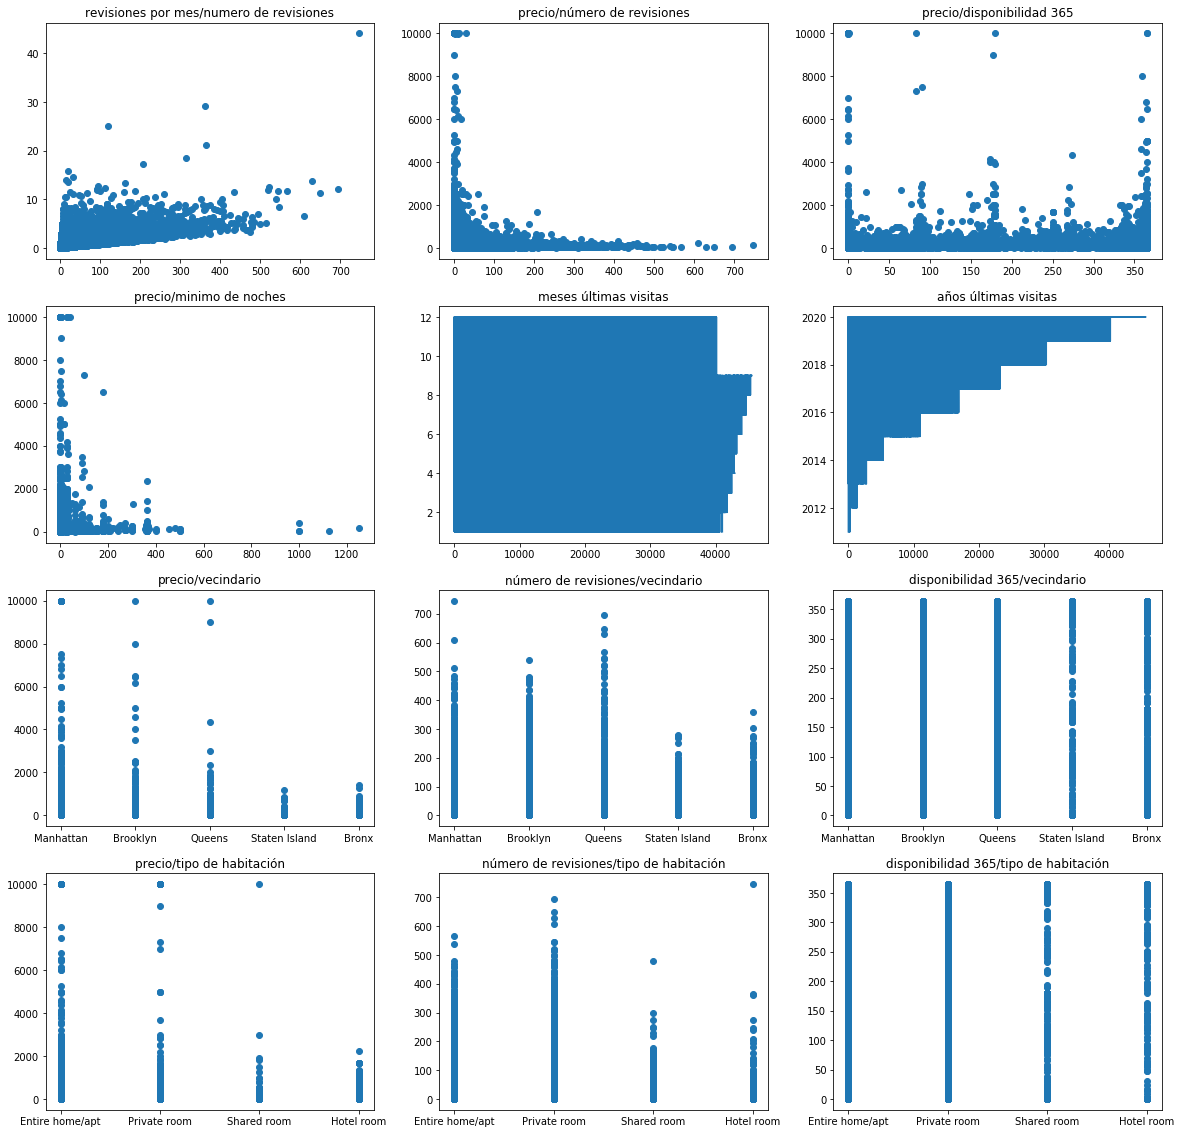

In [13]:
fig,ax=plt.subplots(4,3,figsize=(20,20))
ax[0,0].scatter(df["number_of_reviews"],df["reviews_per_month"])
ax[0,0].set_title("revisiones por mes/numero de revisiones")
ax[0,1].scatter(df["number_of_reviews"],df_cat["price"])
ax[0,1].set_title("precio/número de revisiones")
ax[0,2].scatter(df["availability_365"],df_cat["price"])
ax[0,2].set_title("precio/disponibilidad 365")

ax[1,0].scatter(df["minimum_nights"],df_cat["price"])
ax[1,0].set_title("precio/minimo de noches")
ax[1,1].plot(df_cat["month"])
ax[1,1].set_title("meses últimas visitas")
ax[1,2].plot(df_cat["year"])
ax[1,2].set_title("años últimas visitas")

ax[2,0].scatter(df["neighbourhood_group"],df["price"])
ax[2,0].set_title("precio/vecindario")
ax[2,1].scatter(df["neighbourhood_group"],df["number_of_reviews"]) 
ax[2,1].set_title("número de revisiones/vecindario")
ax[2,2].scatter(df["neighbourhood_group"],df["availability_365"])
ax[2,2].set_title("disponibilidad 365/vecindario")

ax[3,0].scatter(df["room_type"],df_cat["price"])
ax[3,0].set_title("precio/tipo de habitación")
ax[3,1].scatter(df["room_type"],df["number_of_reviews"]) 
ax[3,1].set_title("número de revisiones/tipo de habitación")
ax[3,2].scatter(df["room_type"],df["availability_365"])
ax[3,2].set_title("disponibilidad 365/tipo de habitación")

## Info Vecindarios 

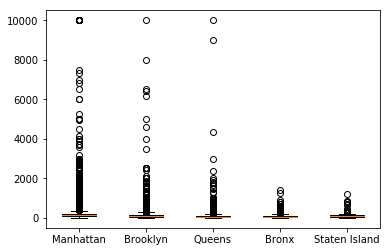

In [14]:
df1=df.groupby(["neighbourhood_group"])
p_manhattan=df1.get_group("Manhattan")["price"]
p_brooklyn=df1.get_group("Brooklyn")["price"]
p_queens=df1.get_group("Queens")["price"]
p_bronx=df1.get_group("Bronx")["price"]
p_island=df1.get_group("Staten Island")["price"]
boxplot=plt.boxplot([p_manhattan,p_brooklyn,p_queens,p_bronx,p_island],vert=True,patch_artist=True,labels=["Manhattan","Brooklyn","Queens","Bronx","Staten Island"])
boxplot=plt.show()

Text(0.5,1,'Staten Island')

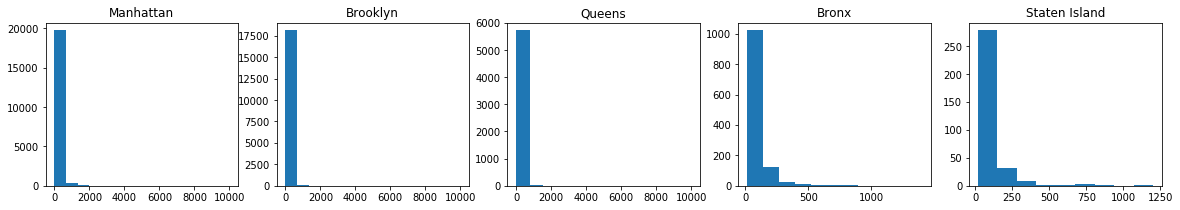

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,3))
ax[0].hist(p_manhattan,bins=round(1+3.32*math.log10(len(p_manhattan))))
ax[0].set_title("Manhattan")
ax[1].hist(p_brooklyn,bins=round(1+3.32*math.log10(len(p_brooklyn))))
ax[1].set_title("Brooklyn")
ax[2].hist(p_queens,bins=round(1+3.32*math.log10(len(p_queens))))
ax[2].set_title("Queens")
ax[3].hist(p_bronx,bins=round(1+3.32*math.log10(len(p_bronx))))
ax[3].set_title("Bronx")
ax[4].hist(p_island,bins=round(1+3.32*math.log10(len(p_island))))
ax[4].set_title("Staten Island")

44576


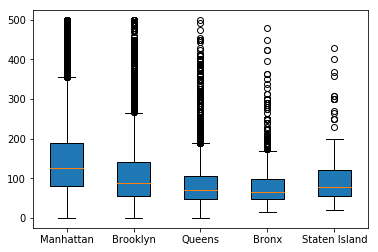

In [16]:
#Es necesario quitar outliers (>500)
df_outliers=df[df["price"]<500]
print(len(df_outliers))
df2=df_outliers[["neighbourhood_group","price"]].groupby(["neighbourhood_group"])
p_manhattan=df2.get_group("Manhattan")["price"]
p_brooklyn=df2.get_group("Brooklyn")["price"]
p_queens=df2.get_group("Queens")["price"]
p_bronx=df2.get_group("Bronx")["price"]
p_island=df2.get_group("Staten Island")["price"]
boxplot=plt.boxplot([p_manhattan,p_brooklyn,p_queens,p_bronx,p_island],vert=True,patch_artist=True,labels=["Manhattan","Brooklyn","Queens","Bronx","Staten Island"])
boxplot=plt.show()

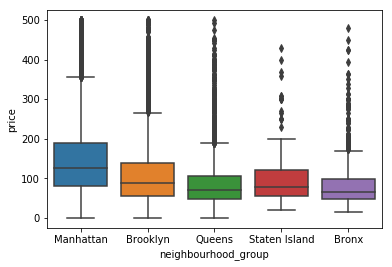

In [17]:
boxplot=sns.boxplot(df_outliers["neighbourhood_group"],df_outliers["price"])

Text(0.5,1,'Staten Island')

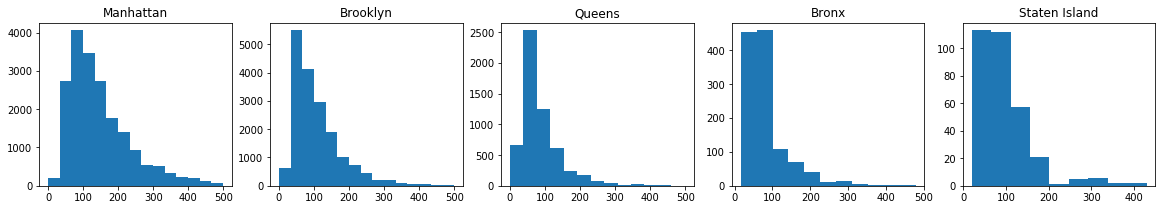

In [18]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,3))
ax[0].hist(p_manhattan,bins=round(1+3.32*math.log10(len(p_manhattan))))
ax[0].set_title("Manhattan")
ax[1].hist(p_brooklyn,bins=round(1+3.32*math.log10(len(p_brooklyn))))
ax[1].set_title("Brooklyn")
ax[2].hist(p_queens,bins=round(1+3.32*math.log10(len(p_queens))))
ax[2].set_title("Queens")
ax[3].hist(p_bronx,bins=round(1+3.32*math.log10(len(p_bronx))))
ax[3].set_title("Bronx")
ax[4].hist(p_island,bins=round(1+3.32*math.log10(len(p_island))))
ax[4].set_title("Staten Island")

## Seleccionar solo datos de neighbourhooh_group son outliers

In [19]:
df_manhattan=df[["neighbourhood_group","price"]][(df["neighbourhood_group"]=="Manhattan") & (df["price"]<320)]
pr_manhattan=df_manhattan["price"]
df_brooklyn=df[["neighbourhood_group","price"]][(df["neighbourhood_group"]=="Brooklyn") & (df["price"]<260)]
pr_brooklyn=df_brooklyn["price"]
df_queens=df[["neighbourhood_group","price"]][(df["neighbourhood_group"]=="Queens") & (df["price"]<180)]
pr_queens=df_queens["price"]
df_bronx=df[["neighbourhood_group","price"]][(df["neighbourhood_group"]=="Bronx") & (df["price"]<170)]
pr_bronx=df_bronx["price"]
df_island=df[["neighbourhood_group","price"]][(df["neighbourhood_group"]=="Staten Island") & (df["price"]<200)]
pr_island=df_island["price"]
print(len(df_manhattan)+len(df_brooklyn)+len(df_queens)+len(df_bronx)+len(df_island))

42131


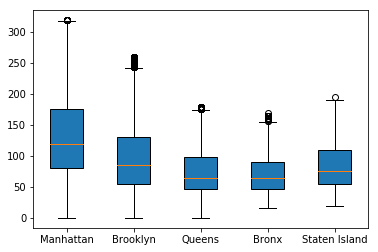

In [20]:
boxplot=plt.boxplot([pr_manhattan,pr_brooklyn,pr_queens,pr_bronx,pr_island],vert=True,patch_artist=True,labels=["Manhattan","Brooklyn","Queens","Bronx","Staten Island"])
boxplot=plt.show()

Text(0.5,1,'Staten Island')

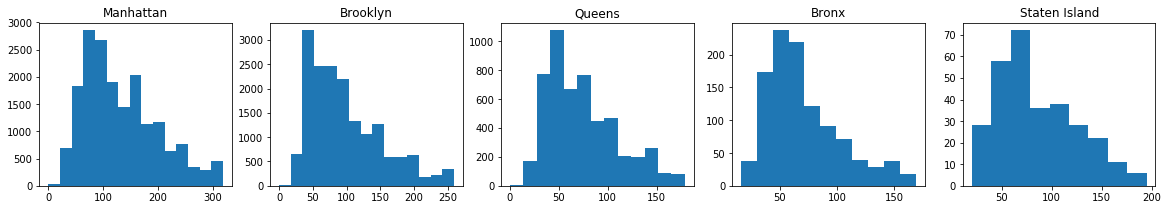

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,3))
ax[0].hist(pr_manhattan,bins=round(1+3.32*math.log10(len(pr_manhattan))))
ax[0].set_title("Manhattan")
ax[1].hist(pr_brooklyn,bins=round(1+3.32*math.log10(len(pr_brooklyn))))
ax[1].set_title("Brooklyn")
ax[2].hist(pr_queens,bins=round(1+3.32*math.log10(len(pr_queens))))
ax[2].set_title("Queens")
ax[3].hist(pr_bronx,bins=round(1+3.32*math.log10(len(pr_bronx))))
ax[3].set_title("Bronx")
ax[4].hist(pr_island,bins=round(1+3.32*math.log10(len(pr_island))))
ax[4].set_title("Staten Island")

In [22]:
g_v=df[["neighbourhood_group","price"]].groupby("neighbourhood_group").describe()
g_v.sort_values(by=("price","count"),ascending=False)

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Manhattan            20236.0  193.050603  420.378971   0.0  83.0  129.0   
Brooklyn             18263.0  121.079943  183.760946   0.0  57.0   90.0   
Queens                5746.0  100.709189  217.053157   0.0  49.0   70.0   
Bronx                 1185.0   92.586498   97.814511  16.0  50.0   67.0   
Staten Island          326.0  113.202454  124.249360  20.0  57.0   80.5   

                                     
                       75%      max  
neighbourhood_group                  
Manhattan            200.0  10000.0  
Brooklyn             145.0  10000.0  
Queens               108.0  10000.0  
Bronx                100.0   1404.0  
Staten Island        125.0   1200.0

In [23]:
df_vecindarios=df_manhattan.describe().rename(columns={"price":"Manhattan"})
df_vecindarios["Brooklyn"]=df_brooklyn.describe()
df_vecindarios["Queens"]=df_queens.describe()
df_vecindarios["Bronx"]=df_bronx.describe()
df_vecindarios["Staten Island"]=df_island.describe()
df_vecindarios.transpose()
#La Std disminuye bastante

,count,mean,std,min,25%,50%,75%,max
Manhattan,18286.0,132.335612,67.446976,0.0,80.0,120.0,175.0,319.0
Brooklyn,17245.0,98.248072,53.573400,0.0,55.0,85.0,130.0,259.0
Queens,5224.0,74.477029,35.908678,0.0,47.0,65.0,98.0,179.0
Bronx,1077.0,70.909935,32.524401,16.0,47.0,64.0,90.0,169.0
Staten Island,299.0,85.361204,39.968318,20.0,55.0,75.0,110.0,195.0


## Info Barrios ORDER BY DESCENDING Cantidad 

In [24]:
barrios=df[["neighbourhood","price"]].groupby("neighbourhood").describe()
barrios.sort_values(by=("price","count"),ascending=False)

price                                          \
                             count        mean          std    min     25%   
neighbourhood                                                                
Williamsburg                3414.0  133.108670   133.290771    0.0   68.00   
Bedford-Stuyvesant          3371.0  107.417977   150.725395   15.0   50.00   
Harlem                      2463.0  118.615510   188.700056   10.0   60.00   
Bushwick                    2169.0   83.740894    94.363390   10.0   45.00   
Upper West Side             1832.0  195.545852   343.487247   29.0   90.00   
Hell's Kitchen              1816.0  192.268172   246.604103    0.0   99.00   
East Village                1675.0  172.674627   304.975452   11.0   95.00   
Upper East Side             1636.0  185.915037   330.891947    0.0   99.00   
Midtown                     1629.0  301.504604   724.936332    0.0  110.00   
Crown Heights               1425.0  112.632281   152.928155   16.0   55.00   
Chelsea                     1102.0  218.645191   340.485986    0.0  103.25   
Greenpoint                   990.0  141.557576   337.558036   17.0   75.00   
East Harlem                  978.0  139.017382   405.740808   17.0   65.00   
Washington Heights           856.0  100.650701   215.363282   18.0   50.00   
Astoria                      853.0   98.126612   115.537417   19.0   54.00   
Lower East Side              805.0  197.227329   616.594595    0.0   85.00   
West Village                 697.0  234.799139   295.807136   50.0  125.00   
Flatbush                     569.0   95.915641   114.005791   20.0   48.00   
Clinton Hill                 530.0  179.850943   495.318151   22.0   80.00   
Long Island City             522.0  143.197318   462.532009    0.0   60.00   
Financial District           520.0  334.503846  1221.925142    0.0   97.50   
Prospect-Lefferts Gardens    499.0  106.941884   139.469270   20.0   60.00   
East Flatbush                483.0   86.879917    60.508719   17.0   49.00   
Park Slope                   462.0  168.209957   133.113008   29.0   95.00   
Murray Hill                  446.0  215.757848   495.175456    0.0  100.00   
Fort Greene                  426.0  155.330986   127.106258   32.0   88.50   
Kips Bay                     421.0  196.220903   262.496197   30.0   98.00   
Flushing                     402.0   96.659204   138.240027   11.0   50.00   
Chinatown                    387.0  140.881137   113.494773    0.0   80.00   
Sunnyside                    378.0   83.177249    65.238984   17.0   45.00   
...                            ...         ...          ...    ...     ...   
Eltingville                    4.0  155.750000    97.428179   62.0   77.00   
Silver Lake                    4.0   81.250000    15.986974   60.0   73.50   
South Beach                    4.0   48.750000    32.500000   20.0   31.25   
Rosebank                       4.0  123.250000    54.242511   60.0   96.00   
Castleton Corners              4.0  117.000000    88.045443   69.0   73.50   
Holliswood                     4.0  171.000000   143.645397   79.0   94.75   
Todt Hill                      3.0  227.666667   183.753458   69.0  127.00   
Castle Hill                    3.0   91.000000    39.127995   65.0   68.50   
Co-op City                     3.0   61.333333     7.094599   55.0   57.50   
Great Kills                    3.0   68.333333    27.736859   45.0   53.00   
West Farms                     3.0   70.000000     5.000000   65.0   67.50   
Howland Hook                   3.0  144.666667    39.501055  100.0  129.50   
New Dorp                       3.0  103.333333    67.884706   40.0   67.50   
Richmondtown                   3.0   77.000000    25.534291   55.0   63.00   
Breezy Point                   3.0  228.666667    18.475209  218.0  218.00   
Bull's Head                    3.0   49.666667     9.073772   43.0   44.50   
Neponsit                       2.0  275.000000   106.066017  200.0  237.50   
Graniteville                   2.0   78.000000    5

In [25]:
barrios_manhattan=df[["neighbourhood_group","neighbourhood"]][df["neighbourhood_group"]=="Manhattan"]
barrios_brooklyn=df[["neighbourhood_group","neighbourhood"]][df["neighbourhood_group"]=="Brooklyn"]
barrios_queens=df[["neighbourhood_group","neighbourhood"]][df["neighbourhood_group"]=="Queens"]
barrios_bronx=df[["neighbourhood_group","neighbourhood"]][df["neighbourhood_group"]=="Bronx"]
barrios_island=df[["neighbourhood_group","neighbourhood"]][df["neighbourhood_group"]=="Staten Island"]
barrios=barrios_manhattan["neighbourhood"].describe().rename("Manhattan").to_frame()
barrios["Brooklyn"]=barrios_brooklyn["neighbourhood"].describe().rename("Brooklyn").to_frame()
barrios["Queens"]=barrios_queens["neighbourhood"].describe().rename("Queens").to_frame()
barrios["Bronx"]=barrios_bronx["neighbourhood"].describe().rename("Bronx").to_frame()
barrios["Staten Island"]=barrios_island["neighbourhood"].describe().rename("Staten Island").to_frame()
barrios.transpose()

,count,unique,top,freq
Manhattan,20236,32,Harlem,2463
Brooklyn,18263,48,Williamsburg,3414
Queens,5746,51,Astoria,853
Bronx,1185,48,Wakefield,82
Staten Island,326,43,St. George,56


## Info Tipo Habitaciones 

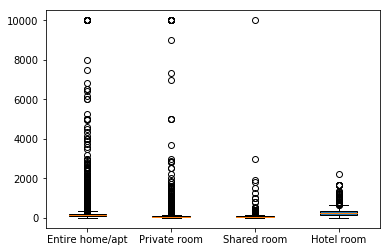

In [26]:
df1=df.groupby(["room_type"])
p_entire=df1.get_group("Entire home/apt")["price"]
p_private=df1.get_group("Private room")["price"]
p_shared=df1.get_group("Shared room")["price"]
p_hotel=df1.get_group("Hotel room")["price"]
boxplot=plt.boxplot([p_entire,p_private,p_shared,p_hotel],vert=True,patch_artist=True,labels=["Entire home/apt","Private room","Shared room","Hotel room"])
boxplot=plt.show()

Text(0.5,1,'Hotel room')

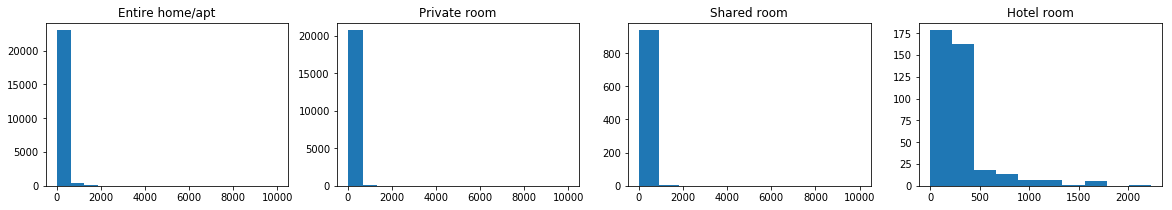

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,3))
ax[0].hist(p_entire,bins=round(1+3.32*math.log10(len(p_entire))))
ax[0].set_title("Entire home/apt")
ax[1].hist(p_private,bins=round(1+3.32*math.log10(len(p_private))))
ax[1].set_title("Private room")
ax[2].hist(p_shared,bins=round(1+3.32*math.log10(len(p_shared))))
ax[2].set_title("Shared room")
ax[3].hist(p_hotel,bins=round(1+3.32*math.log10(len(p_hotel))))
ax[3].set_title("Hotel room")

44909


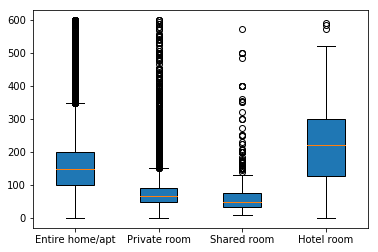

In [28]:
#Es necesario quitar outliers (>400)
df_outliers2=df[df["price"]<600]
print(len(df_outliers2))
df2=df_outliers2[["room_type","price"]].groupby(["room_type"])
p_entire=df2.get_group("Entire home/apt")["price"]
p_private=df2.get_group("Private room")["price"]
p_shared=df2.get_group("Shared room")["price"]
p_hotel=df2.get_group("Hotel room")["price"]
boxplot=plt.boxplot([p_entire,p_private,p_shared,p_hotel],vert=True,patch_artist=True,labels=["Entire home/apt","Private room","Shared room","Hotel room"])
boxplot=plt.show()

Text(0.5,1,'Hotel room')

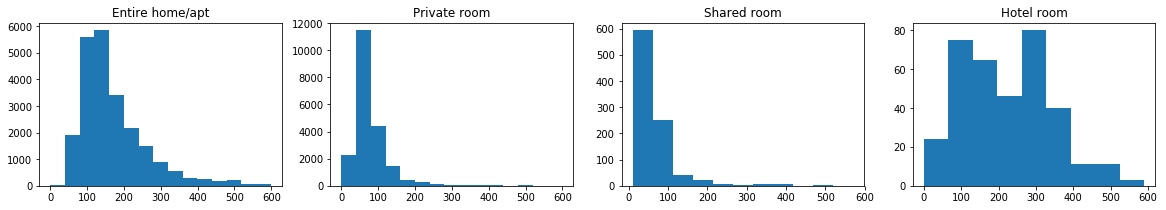

In [29]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,3))
ax[0].hist(p_entire,bins=round(1+3.32*math.log10(len(p_entire))))
ax[0].set_title("Entire home/apt")
ax[1].hist(p_private,bins=round(1+3.32*math.log10(len(p_private))))
ax[1].set_title("Private room")
ax[2].hist(p_shared,bins=round(1+3.32*math.log10(len(p_shared))))
ax[2].set_title("Shared room")
ax[3].hist(p_hotel,bins=round(1+3.32*math.log10(len(p_hotel))))
ax[3].set_title("Hotel room")

In [30]:
df_entire=df[["room_type","price"]][(df["room_type"]=="Entire home/apt") & (df["price"]<330)]
pr_entire=df_entire["price"]
df_private=df[["room_type","price"]][(df["room_type"]=="Private room") & (df["price"]<140)]
pr_private=df_private["price"]
df_shared=df[["room_type","price"]][(df["room_type"]=="Shared room") & (df["price"]<150)]
pr_shared=df_shared["price"]
df_hotel=df[["room_type","price"]][(df["room_type"]=="Hotel room") & (df["price"]<580)]
pr_hotel=df_hotel["price"]
print(len(df_entire)+len(df_private)+len(df_shared)+len(df_hotel))

41680


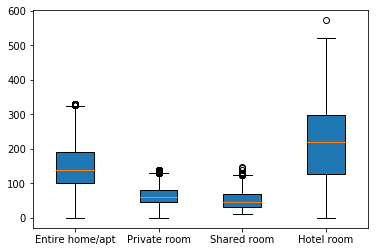

In [31]:
boxplot=plt.boxplot([pr_entire,pr_private,pr_shared,pr_hotel],vert=True,patch_artist=True,labels=["Entire home/apt","Private room","Shared room","Hotel room"])
boxplot=plt.show()

Text(0.5,1,'Hotel room')

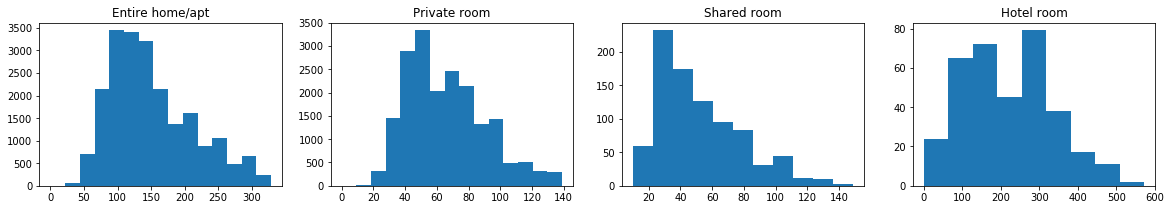

In [32]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,3))
ax[0].hist(pr_entire,bins=round(1+3.32*math.log10(len(pr_entire))))
ax[0].set_title("Entire home/apt")
ax[1].hist(pr_private,bins=round(1+3.32*math.log10(len(pr_private))))
ax[1].set_title("Private room")
ax[2].hist(pr_shared,bins=round(1+3.32*math.log10(len(pr_shared))))
ax[2].set_title("Shared room")
ax[3].hist(pr_hotel,bins=round(1+3.32*math.log10(len(pr_hotel))))
ax[3].set_title("Hotel room")

In [33]:
g_v2=df[["room_type","price"]].groupby("room_type").describe()
g_v2.sort_values(by=("price","count"),ascending=False)

price                                                     \
                   count        mean         std   min    25%    50%    75%   
room_type                                                                     
Entire home/apt  23577.0  201.145354  343.300633   0.0  104.0  150.0  205.0   
Private room     20842.0   91.043710  265.274407   0.0   49.0   65.0   90.0   
Shared room        944.0   89.241525  361.139661  10.0   34.0   48.0   75.0   
Hotel room         393.0  302.717557  302.024443   0.0  129.0  248.0  334.0   

                          
                     max  
room_type                 
Entire home/apt  10000.0  
Private room     10000.0  
Shared room      10000.0  
Hotel room        2229.0

In [34]:
df_thabitacion=df_entire.describe().rename(columns={"price":"Entire home/apt"})
df_thabitacion["Private room"]=df_private.describe()
df_thabitacion["Shared room"]=df_shared.describe()
df_thabitacion["Hotel room"]=df_hotel.describe()
df_thabitacion.transpose()
#La Std disminuye bastante

,count,mean,std,min,25%,50%,75%,max
Entire home/apt,21465.0,150.953645,62.318109,0.0,100.0,140.0,190.0,329.0
Private room,18992.0,65.840933,24.992169,0.0,47.0,60.0,80.0,139.0
Shared room,870.0,52.304598,25.895076,10.0,33.0,45.0,69.0,149.0
Hotel room,353.0,218.679887,117.664378,0.0,127.0,220.0,299.0,573.0


## Info Vecindario y Tipo de Habitación

In [35]:
df_m=df[df["price"]<500] #se quito outliers en lo posible pero igual quedaron varios
grupo_vecindario_hab=df_m[["neighbourhood_group","room_type","price"]].groupby(["neighbourhood_group","room_type"]).count().rename(columns={"price":"count"})
grupo_vecindario_hab["mean"]=df_m[["neighbourhood_group","room_type","price"]].groupby(["neighbourhood_group","room_type"]).mean()
grupo_vecindario_hab["std"]=df_m[["neighbourhood_group","room_type","price"]].groupby(["neighbourhood_group","room_type"]).std()
grupo_vecindario_hab["min"]=df_m[["neighbourhood_group","room_type","price"]].groupby(["neighbourhood_group","room_type"]).min()
grupo_vecindario_hab["max"]=df_m[["neighbourhood_group","room_type","price"]].groupby(["neighbourhood_group","room_type"]).max()
grupo_vecindario_hab.sort_values(by=["neighbourhood_group","room_type"],ascending=True)

count        mean         std  min  max
neighbourhood_group room_type                                               
Bronx               Entire home/apt    407  121.292383   66.028621   25  479
                    Private room       717   65.580195   43.374178   16  450
                    Shared room         46   50.217391   29.409683   20  150
Brooklyn            Entire home/apt   8716  151.054039   73.257972   10  499
                    Hotel room          27  136.629630   62.106081    0  349
                    Private room      8940   68.415101   40.045433   10  499
                    Shared room        326   54.226994   46.751428   15  350
Manhattan           Entire home/apt  11348  180.881565   86.640485    0  499
                    Hotel room         308  226.610390  117.620148    0  486
                    Private room      7353   94.471372   57.832036    0  499
                    Shared room        381   75.716535   59.989547   10  485
Queens              Entire home/apt   2016  132.895337   69.051680   11  493
                    Hotel room          16  163.375000   62.345141    0  249
                    Private room      3483   64.253804   39.496383   10  499
                    Shared room        173   58.167630   54.900022   14  399
Staten Island       Entire home/apt    168  126.136905   69.384456   28  429
                    Private room       147   66.598639   38.025345   20  300
                    Shared room          4   56.750000   29.432125   20   82

## Dispersión Latitud v/s Longitud

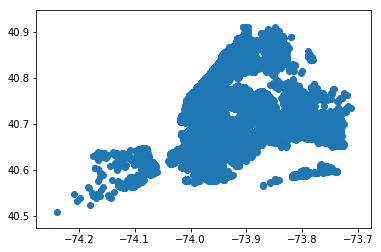

In [38]:
plt.scatter(df["longitude"],df["latitude"])

## Info con respecto a palabras (name)

In [39]:
nombres=df["name"].value_counts().to_frame()
nombres.rename(columns={"name":"Cantidad"},inplace=True)
nombres.index.name="Anuncio"
nombres.sort_values(by="Cantidad",ascending=False) #Breakfast, Cozy, Quiet, Private, luxury

,Cantidad
Anuncio,
Home away from home,24
New york Multi-unit building,15
Studio Loft,15
Private room,12
Brooklyn Apartment,10
Cozy Brooklyn Apartment,10
Cozy neighborhood Subway M/R<2min> & 7 Line<5min>,9
2020 Remodeled Brand New apartment in Bushwick,8
Studio Loft: Cleaning CDC guidelines implemented,8


In [40]:
palabras=[]
for i in range(len(df)):
    lista=re.findall("\w+",str(df.loc[i,"name"]))
    for j in lista:
        palabras.append(str(j).lower())

palabras2=[]
for i in palabras:
    if len(i)>3:
        palabras2.append(i)

unicos=pd.unique(palabras2)
print(unicos)

print(f"Catntidad de palabras= {len(palabras)}")
print(f"Cantidad palabras unicas= {len(unicos)}")
print(f"Catntidad de palabras= {len(palabras2)}")

['skylit' 'midtown' 'castle' ... 'mimi' 'clothing' 'sensual']
Catntidad de palabras= 281823
Cantidad palabras unicas= 6815
Catntidad de palabras= 200346


In [41]:
indices=list(i for i in range(len(palabras2)))
palabras_df=pd.DataFrame({"indices":indices,"palabras":palabras2})
palabras_df.groupby("palabras").count().sort_values(by="indices",ascending=False).rename(columns={"indices":"cantidades"}).head(n=60)

,cantidades
palabras,
room,9617
bedroom,7635
private,6845
apartment,6520
cozy,4755
studio,3909
brooklyn,3784
spacious,3555
manhattan,3256
